# Intelligent chunking methods for code documentation RAG

In [12]:
import pandas as pd

from sentence_transformers import SentenceTransformer
from fixed_token_chunker import FixedTokenChunker

from retrieval_evaluation_pipeline import *
from dataset_analysis import analyze_relevant_excerpts
from visualization_utils import plot_highlights_distribution, plot_highlighted_tokens_distribution
from hyperparameter_tuning import grid_search
from visualization_utils import plot_results_table

In [3]:
corpus_id = 'state_of_the_union'

chunker = FixedTokenChunker(
    encoding_name='cl100k_base',
    chunk_size=250,
    chunk_overlap=125,
)

model_id = 'all-MiniLM-L6-v2'
#model_id = 'multi-qa-mpnet-base-dot-v1'
model = SentenceTransformer('sentence-transformers/'+model_id)

embedding_function = lambda text: model.encode(text)

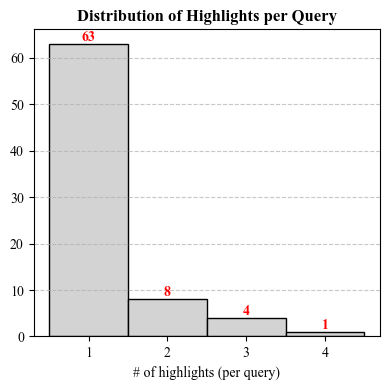

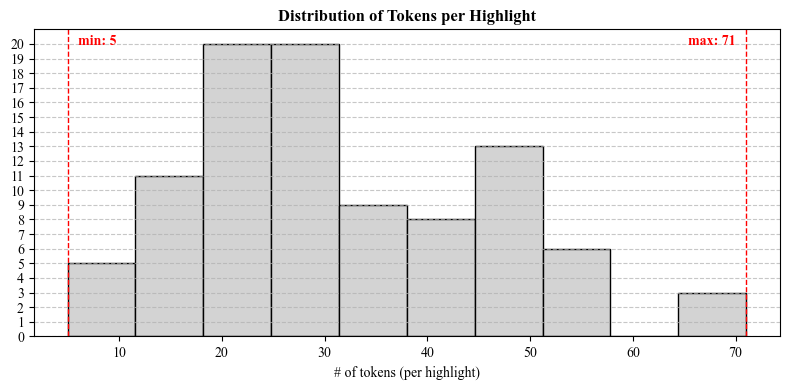

In [4]:
highlights_per_query, tokens_per_highlight = analyze_relevant_excerpts(corpus_id)

plot_highlights_distribution(highlights_per_query)
plot_highlighted_tokens_distribution(tokens_per_highlight)

In [ ]:
chunk_size_values = [100, 200, 300, 400, 500]
overlap_percentages = [10, 20, 30, 40, 50]
Nr_values = range(1,11,2)

results, results_str = grid_search(corpus_id, embedding_function, chunk_size_values, overlap_percentages, Nr_values)

#print(results_str)
#plot_results_table(results_str)

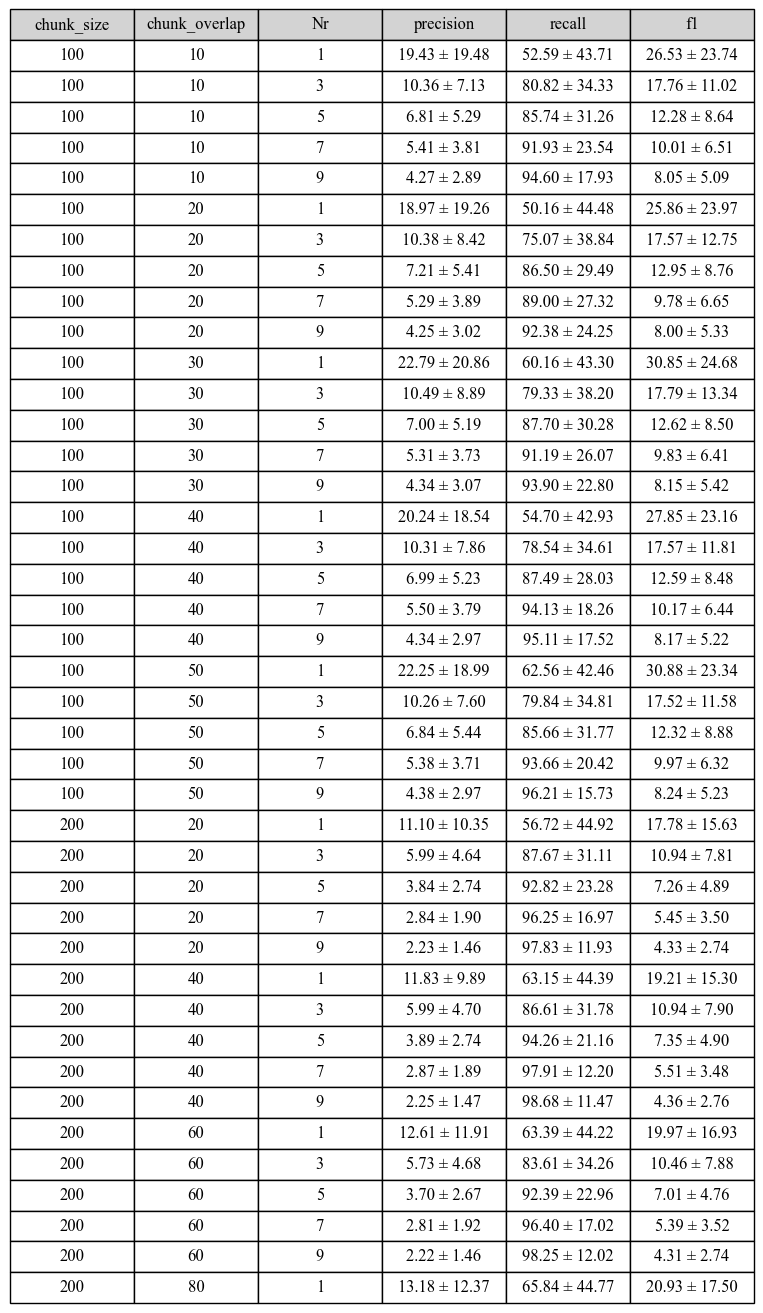

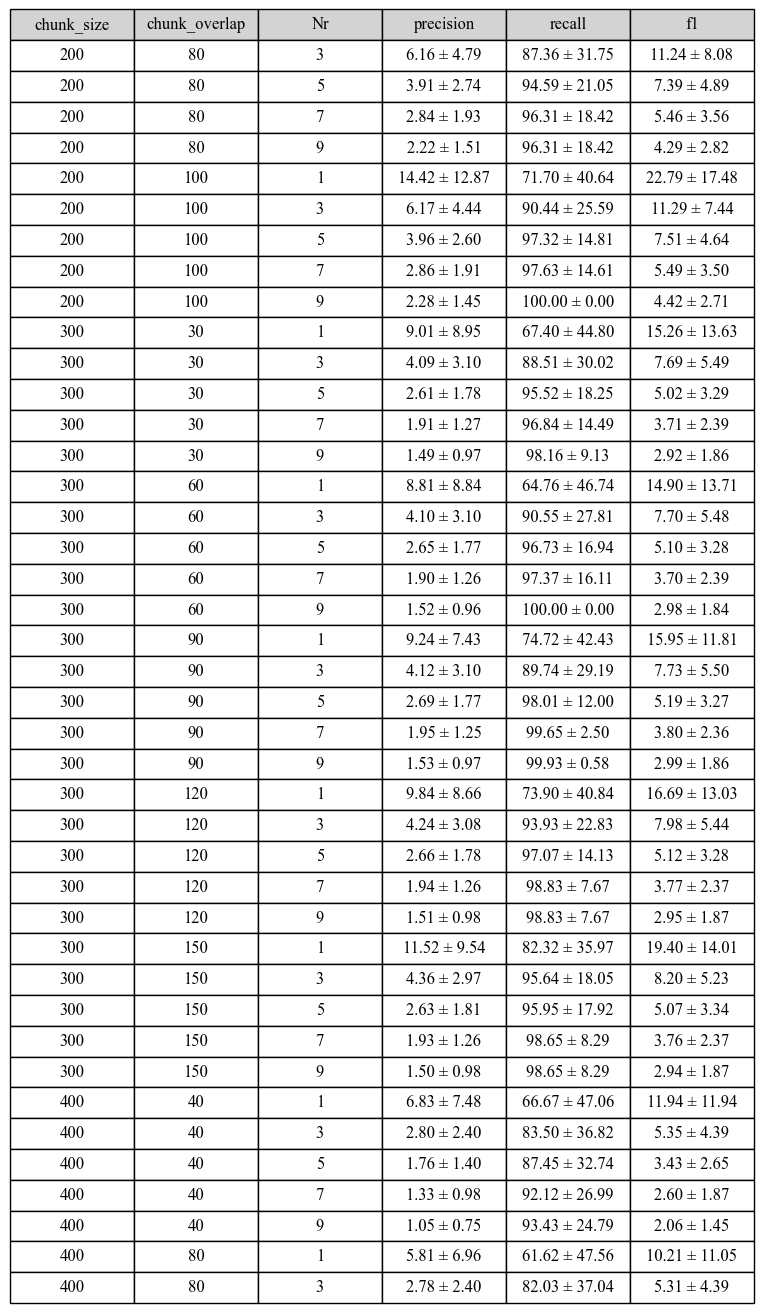

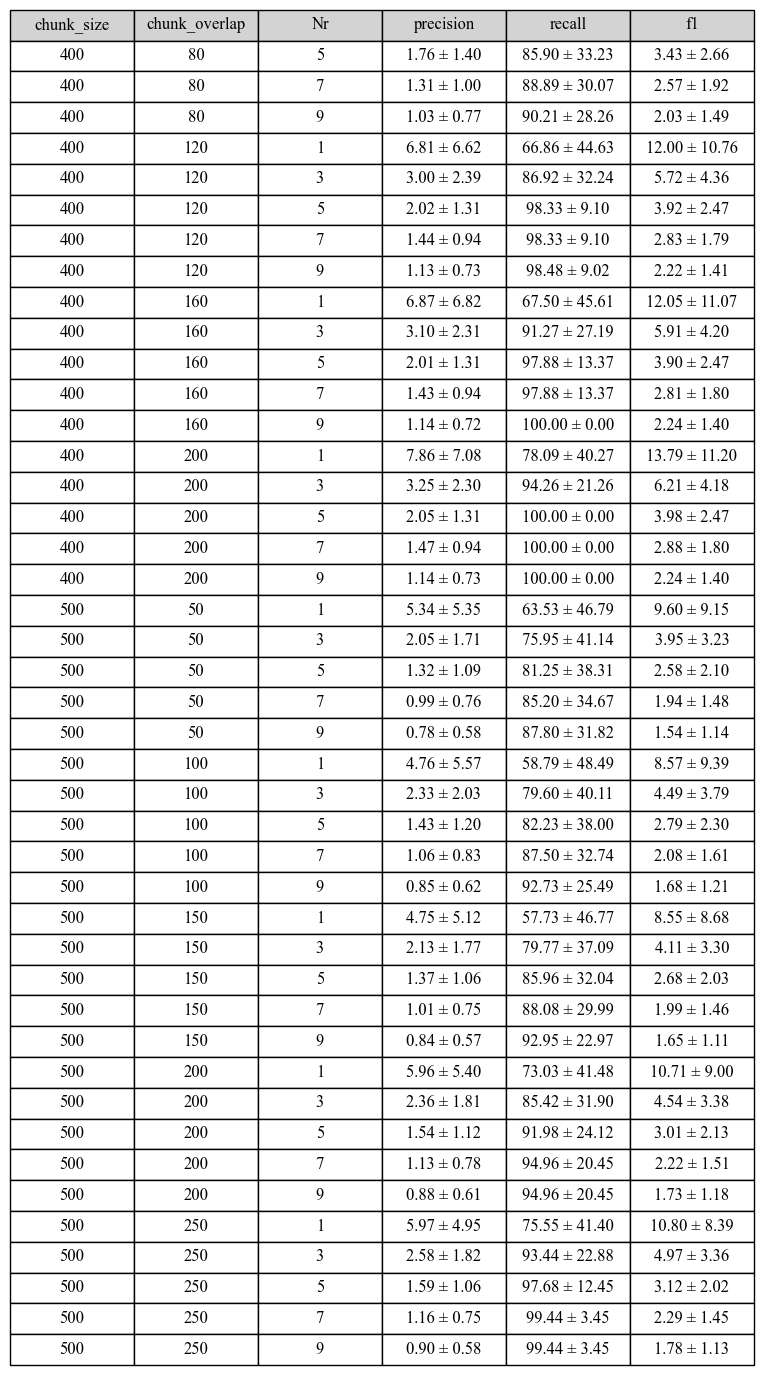

Index(['chunk_size', 'chunk_overlap', 'Nr', 'precision_mean', 'precision_std',
       'recall_mean', 'recall_std', 'f1_mean', 'f1_std'],
      dtype='object')
Max precision score row:
chunk_size        100.000000
chunk_overlap      30.000000
Nr                  1.000000
precision_mean     22.788040
precision_std      20.861014
recall_mean        60.162646
recall_std         43.298320
f1_mean            30.848228
f1_std             24.680285
Name: 10, dtype: float64
Max recall score row:
chunk_size        200.000000
chunk_overlap     100.000000
Nr                  9.000000
precision_mean      2.277478
precision_std       1.447859
recall_mean       100.000000
recall_std          0.000000
f1_mean             4.415743
f1_std              2.705295
Name: 49, dtype: float64
Max F1 score row:
chunk_size        100.000000
chunk_overlap      50.000000
Nr                  1.000000
precision_mean     22.253589
precision_std      18.988656
recall_mean        62.563754
recall_std         42.459403
f

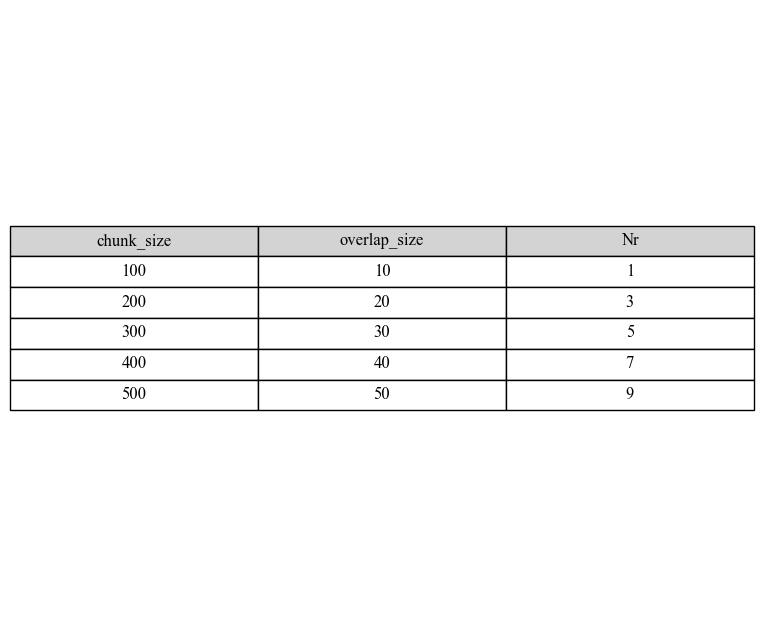

In [24]:
# Splitting large table into 3 parts

len_third = len(results_str) // 3

results_str1 = results_str.iloc[:len_third]
results_str2 = results_str.iloc[len_third:2*len_third]
results_str3 = results_str.iloc[2*len_third:]

plot_results_table(results_str1)
plot_results_table(results_str2)
plot_results_table(results_str3)

# Transforming numerical evaluation results stored in a dictionary into a structured DataFrame

rows = [
    {
        'chunk_size': k[0],
        'chunk_overlap': k[1],
        'Nr': k[2],
        **v
    }
    for k, v in results.items()
]
results_df = pd.DataFrame(rows)
print(results_df.columns)

# Identifying hyperparameters that optimize evaluation metrics

max_precision_row = results_df.loc[results_df['precision_mean'].idxmax()]
print('Max precision score row:')
print(max_precision_row)

max_recall_row = results_df.loc[results_df['recall_mean'].idxmax()]
print('Max recall score row:')
print(max_recall_row)

max_f1_row = results_df.loc[results_df['f1_mean'].idxmax()]
print('Max F1 score row:')
print(max_f1_row)

# Displaying the table of hyperparameters used in grid search

parameters = pd.DataFrame({
    'chunk_size': chunk_size_values,
    'overlap_size': overlap_percentages,
    'Nr': Nr_values
})

plot_results_table(parameters)

Precision:
Evaluation results:
	Precision: 22.79 ± 20.86 %
	Recall: 60.16 ± 43.30 %
	F1 score: 30.85 ± 24.68 %


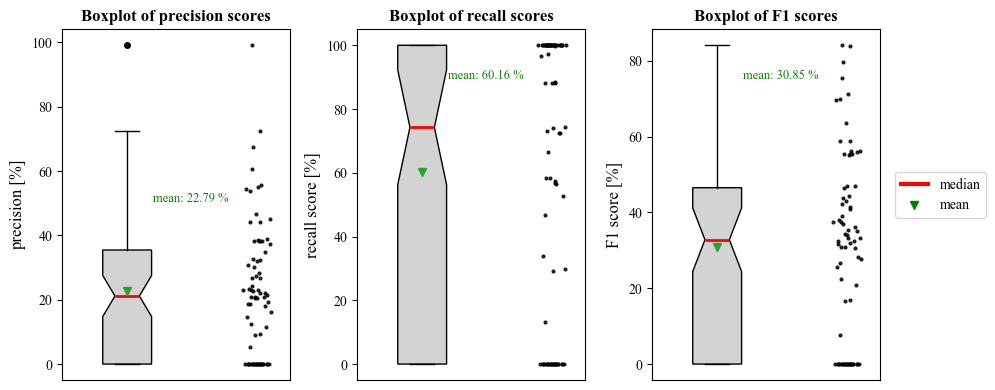

In [27]:
# Best hyperparameter combination for highest precision

print('Precision:')

chunk_size_opt = 100
overlap_percentage_opt = 30
Nr_opt = 1

chunker = FixedTokenChunker(
    encoding_name='cl100k_base',
    chunk_size=chunk_size_opt,
    chunk_overlap=int(overlap_percentage_opt*chunk_size_opt/100),
)

metrics, metrics_summary = retrieval_evaluation_pipeline(corpus_id, chunker, embedding_function, Nr_opt, show_plots=True)

Recall:
Evaluation results:
	Precision: 2.28 ± 1.45 %
	Recall: 100.00 ± 0.00 %
	F1 score: 4.42 ± 2.71 %


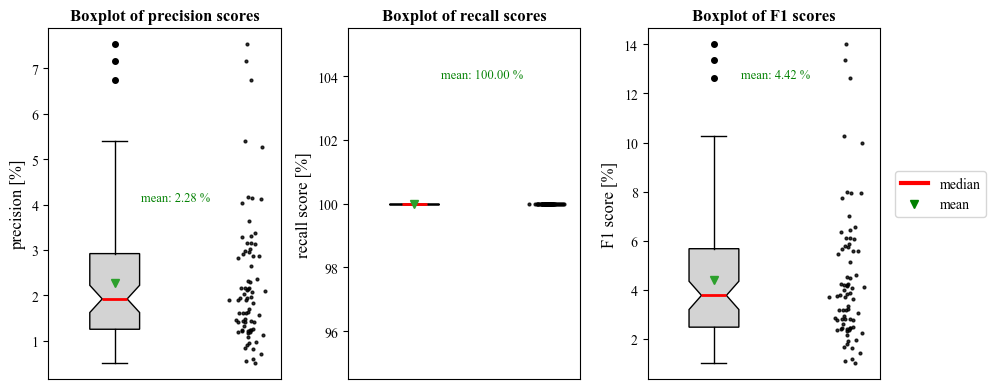

In [26]:
# Best hyperparameter combination for highest recall

print('Recall:')

chunk_size_opt = 200
overlap_percentage_opt = 50
Nr_opt = 9

chunker = FixedTokenChunker(
    encoding_name='cl100k_base',
    chunk_size=chunk_size_opt,
    chunk_overlap=int(overlap_percentage_opt*chunk_size_opt/100),
)

metrics, metrics_summary = retrieval_evaluation_pipeline(corpus_id, chunker, embedding_function, Nr_opt, show_plots=True)

F1 score:
Evaluation results:
	Precision: 22.25 ± 18.99 %
	Recall: 62.56 ± 42.46 %
	F1 score: 30.88 ± 23.34 %


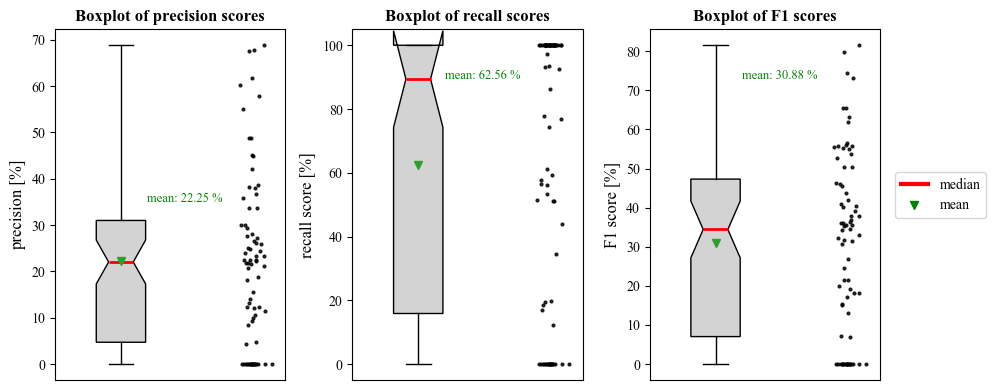

In [28]:
# Best hyperparameter combination for highest f1 score

print('F1 score:')

chunk_size_opt = 100
overlap_percentage_opt = 50
Nr_opt = 1

chunker = FixedTokenChunker(
    encoding_name='cl100k_base',
    chunk_size=chunk_size_opt,
    chunk_overlap=int(overlap_percentage_opt*chunk_size_opt/100),
)

metrics, metrics_summary = retrieval_evaluation_pipeline(corpus_id, chunker, embedding_function, Nr_opt, show_plots=True)

Evaluation results:
	Precision: 13.12 ± 8.33 %
	Recall: 86.41 ± 25.65 %
	F1 score: 21.90 ± 11.86 %


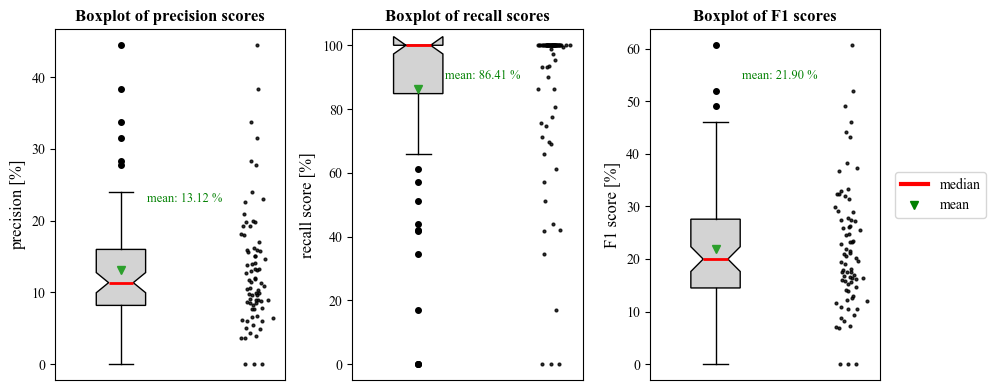

In [29]:
chunk_size_opt = 50
overlap_percentage_opt = 50
Nr_opt = 5

chunker = FixedTokenChunker(
    encoding_name='cl100k_base',
    chunk_size=chunk_size_opt,
    chunk_overlap=int(overlap_percentage_opt*chunk_size_opt/100),
)

metrics, metrics_summary = retrieval_evaluation_pipeline(corpus_id, chunker, embedding_function, Nr_opt, show_plots=True)